**Libraries**

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [213]:
df_clicks = pd.read_csv('../datasets/amazon_affiliate_clicks.csv')
df_conversions = pd.read_csv('../datasets/amazon_affiliate_conversions.csv')
df_products = pd.read_csv('../datasets/amazon_products_catalog.csv', on_bad_lines='skip')
df_users = pd.read_csv('../datasets/user_behavior_analytics.csv')

**Data Explorations**

In [214]:
# Cehck null values in Datafreame
print(df_clicks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   click_id                   200 non-null    object 
 1   user_id                    200 non-null    object 
 2   session_id                 200 non-null    object 
 3   timestamp                  200 non-null    object 
 4   product_asin               200 non-null    object 
 5   product_title              200 non-null    object 
 6   product_category           200 non-null    object 
 7   product_price              200 non-null    float64
 8   affiliate_link             200 non-null    object 
 9   source_page                200 non-null    object 
 10  user_agent                 200 non-null    object 
 11  ip_address                 200 non-null    object 
 12  country                    200 non-null    object 
 13  device_type                200 non-null    object 

In [215]:
print(df_conversions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversion_id            150 non-null    object 
 1   click_id                 135 non-null    object 
 2   user_id                  150 non-null    object 
 3   order_id                 150 non-null    object 
 4   timestamp                150 non-null    object 
 5   product_asin             150 non-null    object 
 6   product_title            150 non-null    object 
 7   product_category         150 non-null    object 
 8   order_value              150 non-null    float64
 9   commission_rate          150 non-null    float64
 10  commission_earned        150 non-null    float64
 11  quantity_purchased       150 non-null    int64  
 12  conversion_time_hours    150 non-null    float64
 13  customer_type            150 non-null    object 
 14  payment_method           1

In [216]:
df_conversions.head()

,conversion_id,click_id,user_id,order_id,timestamp,product_asin,product_title,product_category,order_value,commission_rate,commission_earned,quantity_purchased,conversion_time_hours,customer_type,payment_method,shipping_method,order_status,return_status,customer_lifetime_value,previous_orders_count
0,CONV001,CLK001,USR10001,ORD2024010001,2024-01-01 10:30:45,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,0.040,2.00,1,2.25,New,Credit Card,Standard,Delivered,NaN,49.99,0
1,CONV002,CLK003,USR10003,ORD2024010002,2024-01-01 14:22:18,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Kitchen,79.95,0.030,2.40,1,3.62,Returning,PayPal,Prime,Delivered,NaN,245.87,3
2,CONV003,CLK006,USR10006,ORD2024010003,2024-01-01 16:45:22,B08QRST678,Ring Video Doorbell 4,Home Security,199.99,0.020,4.00,1,3.33,New,Credit Card,Express,Delivered,NaN,199.99,0
3,CONV004,CLK007,USR10007,ORD2024010004,2024-01-01 18:15:33,B07TUVW901,Fitbit Charge 5 Fitness Tracker,Health & Fitness,149.95,0.025,3.75,1,3.55,Returning,Debit Card,Standard,Delivered,NaN,389.75,2
4,CONV005,CLK009,USR10009,ORD2024010005,2024-01-01 19:28:44,B08ABC567,Keurig K-Mini Coffee Maker,Kitchen,59.99,0.030,1.80,1,2.92,New,Credit Card,Prime,Delivered,NaN,59.99,0


The return status column contains 150 of Nan, so we convert to categorical data

In [217]:
df_conversions['return_status'] = df_conversions['return_status'].fillna(0).astype(int)
df_conversions['return_status']

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: return_status, Length: 150, dtype: int64

In [218]:
print(df_conversions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversion_id            150 non-null    object 
 1   click_id                 135 non-null    object 
 2   user_id                  150 non-null    object 
 3   order_id                 150 non-null    object 
 4   timestamp                150 non-null    object 
 5   product_asin             150 non-null    object 
 6   product_title            150 non-null    object 
 7   product_category         150 non-null    object 
 8   order_value              150 non-null    float64
 9   commission_rate          150 non-null    float64
 10  commission_earned        150 non-null    float64
 11  quantity_purchased       150 non-null    int64  
 12  conversion_time_hours    150 non-null    float64
 13  customer_type            150 non-null    object 
 14  payment_method           1

In [219]:
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_asin             63 non-null     object 
 1   product_title            63 non-null     object 
 2   brand                    63 non-null     object 
 3   category                 63 non-null     object 
 4   subcategory              63 non-null     object 
 5   price                    63 non-null     float64
 6   original_price           63 non-null     float64
 7   discount_percentage      63 non-null     int64  
 8   rating                   63 non-null     float64
 9   review_count             63 non-null     int64  
 10  prime_eligible           63 non-null     object 
 11  bestseller_rank          63 non-null     int64  
 12  release_date             63 non-null     object 
 13  dimensions               63 non-null     object 
 14  weight                   63 

In [220]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                308 non-null    object 
 1   user_id                   308 non-null    object 
 2   timestamp                 308 non-null    object 
 3   page_url                  308 non-null    object 
 4   page_title                308 non-null    object 
 5   page_type                 308 non-null    object 
 6   time_on_page_seconds      308 non-null    int64  
 7   scroll_depth_percentage   308 non-null    int64  
 8   bounce_rate               308 non-null    int64  
 9   exit_rate                 308 non-null    int64  
 10  page_views_in_session     308 non-null    int64  
 11  session_duration_minutes  308 non-null    float64
 12  traffic_source            308 non-null    object 
 13  device_type               308 non-null    object 
 14  browser   

**Data Preparation**

1. Encoding for categorical data

In [221]:
df_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   click_id                   200 non-null    object 
 1   user_id                    200 non-null    object 
 2   session_id                 200 non-null    object 
 3   timestamp                  200 non-null    object 
 4   product_asin               200 non-null    object 
 5   product_title              200 non-null    object 
 6   product_category           200 non-null    object 
 7   product_price              200 non-null    float64
 8   affiliate_link             200 non-null    object 
 9   source_page                200 non-null    object 
 10  user_agent                 200 non-null    object 
 11  ip_address                 200 non-null    object 
 12  country                    200 non-null    object 
 13  device_type                200 non-null    object 

In [222]:
df_clicks.head()

,click_id,user_id,session_id,timestamp,product_asin,product_title,product_category,product_price,affiliate_link,source_page,...,ip_address,country,device_type,click_position,page_scroll_depth,time_on_page_before_click,referrer_url,utm_source,utm_medium,utm_campaign
0,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,192.168.1.100,US,Desktop,1,0.75,45,https://google.com/search?q=smart+speakers,google,organic,winter_sale
1,CLK002,USR10002,SES20240101002,2024-01-01 09:22:15,B07FZ8S74R,Fire TV Stick 4K streaming device,Electronics,39.99,https://amzn.to/3abc456,/streaming-devices,...,10.0.0.50,US,Mobile,2,0.60,32,https://facebook.com,facebook,social,tech_deals
2,CLK003,USR10003,SES20240101003,2024-01-01 10:45:30,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Kitchen,79.95,https://amzn.to/3def789,/kitchen-appliances,...,172.16.0.25,CA,Desktop,1,0.85,67,https://pinterest.com,pinterest,social,cooking_essentials
3,CLK004,USR10004,SES20240101004,2024-01-01 11:30:45,B07HGJKL12,Apple AirPods Pro (2nd Generation),Electronics,249.00,https://amzn.to/3ghi012,/audio-devices,...,203.0.113.15,UK,Mobile,3,0.45,28,https://twitter.com,twitter,social,audio_gear
4,CLK005,USR10005,SES20240101005,2024-01-01 12:18:12,B09MNOP345,Ninja Foodi Personal Blender,Kitchen,79.99,https://amzn.to/3jkl345,/small-appliances,...,198.51.100.75,AU,Desktop,2,0.70,52,https://youtube.com,youtube,video,healthy_living


Drop dataframe : 'product_title', 'affiliate_link', 'source_page', 'referrer_url'

In [223]:
#Drop unable to encode columns
df_clicks = df_clicks.drop(columns=['product_title', 'affiliate_link', 'source_page', 'referrer_url'], axis=1)

# Convert categorical columns to numerical codes
cols_to_encode = ['product_category', 'device_type', 'country', 'utm_source', 'utm_medium', 'utm_campaign', 'user_agent']
df_clicks[cols_to_encode] = df_clicks[cols_to_encode].apply(lambda col: col.astype('category').cat.codes)
df_clicks.head()

,click_id,user_id,session_id,timestamp,product_asin,product_category,product_price,user_agent,ip_address,country,device_type,click_position,page_scroll_depth,time_on_page_before_click,utm_source,utm_medium,utm_campaign
0,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,2,49.99,2,192.168.1.100,4,0,1,0.75,45,20,3,183
1,CLK002,USR10002,SES20240101002,2024-01-01 09:22:15,B07FZ8S74R,2,39.99,4,10.0.0.50,4,1,2,0.60,32,17,5,166
2,CLK003,USR10003,SES20240101003,2024-01-01 10:45:30,B08C1W5N87,8,79.95,1,172.16.0.25,1,0,1,0.85,67,43,5,29
3,CLK004,USR10004,SES20240101004,2024-01-01 11:30:45,B07HGJKL12,2,249.00,0,203.0.113.15,3,1,3,0.45,28,61,5,7
4,CLK005,USR10005,SES20240101005,2024-01-01 12:18:12,B09MNOP345,8,79.99,2,198.51.100.75,0,0,2,0.70,52,65,7,68


Create a confousion matrix

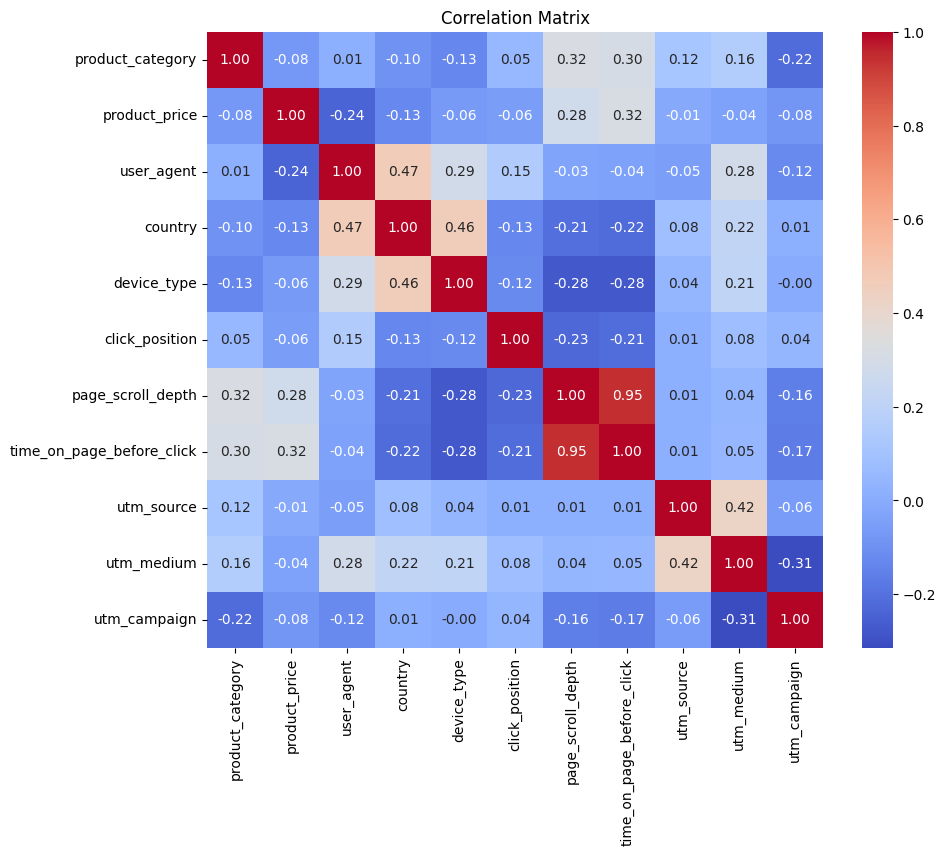

In [227]:
# Select only numerical columns
numerical_df_clicks = df_clicks.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df_clicks.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()